# Timing for a Toymodel Cherenkov Shower

Currently the ImageModel classes in ctapipe only provide methods for obtaining charge. In order for us to create realistic toymodel waveforms, we also need to generate "time images", indicating the pulse time in each pixel.

In [95]:
from ctapipe.image.toymodel import Gaussian
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.image.hillas import camera_to_shower_coordinates
from astropy import units as u
from astropy.coordinates import Angle
import numpy as np
from matplotlib import pyplot as plt

camera = CameraGeometry.from_name("CHEC")

Sampling rate is not in file, defaulting to 1.0 GHz
Reference pulse shape is not in file, defaulting None
Reference pulse shape step is not in file, default: 1.0 ns


## Obtain Image

In [79]:
centroid_x = u.Quantity(0.05, u.m)
centroid_y = u.Quantity(0.05, u.m)
length = u.Quantity(0.03, u.m)
width = u.Quantity(0.008, u.m)
psi = Angle(u.Quantity(70, u.deg))
model = Gaussian(centroid_x, centroid_y, length, width, psi)

_, charge, _ = model.generate_image(camera, 10000)

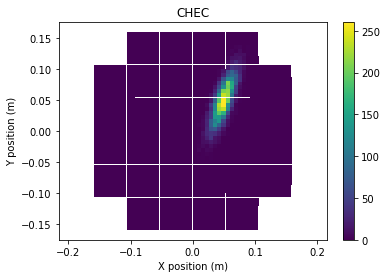

In [80]:
display = CameraDisplay(camera)
display.image = charge
display.add_colorbar()

## Obtain longitudinal coordinates

Based on this image, we wish to obtain the coordinates along the major axis.

The `camera_to_shower_coordinates` method in ctapipe already contains the required transformations, and takes in the same parameters we used to define the image.

In [111]:
longitudinal, transverse = camera_to_shower_coordinates(
    camera.pix_x,
    camera.pix_y,
    centroid_x,
    centroid_y,
    psi
)

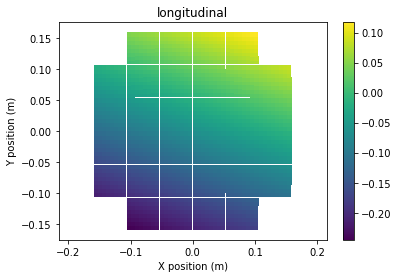

In [113]:
display = CameraDisplay(camera, title="longitudinal")
display.image = longitudinal.value
display.add_colorbar()

## Obtain Time Image

As a Cherenkov shower's most significant time development is along its major axis, we will solely consider a time development along the longitudinal axis for this toy model. We will also assume a linear development of time along this axis.

The only things remaining to define are therefore the `time_gradient` and the `time_intercept`

In [116]:
def obtain_time_image(longitudinal, time_gradient, time_intercept):
    return longitudinal * time_gradient + time_intercept

In [127]:
time_gradient = u.Quantity(3, u.s/u.m)
time_intercept = u.Quantity(40, u.s)
time = obtain_time_image(longitudinal, time_gradient, time_intercept)

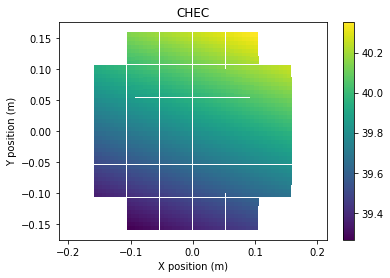

In [128]:
display = CameraDisplay(camera)
display.image = time
display.add_colorbar()